## Monte Carlo simulation

The microstructure often determines the mechanical properties of many materials. Hence, it is essential to know what variables it depends on. Temperature, pressure and composition all affect the microstructure at equilibrium according to the Gibbs Phase Rule. The Gibbs energy for mixing ($\Delta G_{mix}$) determines if two components are soluble or will precipitate and it can be approximated by the regular solution model:

$\Delta G_{mix} = zN_a\Big[\varepsilon_{AB}-\frac{1}{2}\Big(\varepsilon_{AA}+\varepsilon_{BB}\Big)\Big] + RT(\chi_A\cdot ln(\chi_A)+\chi_B ln(\chi_B))$

This model assumes that the volume of pure A equals that of B, which omits the elastic strain field contribution to $\Delta H_{mix}$. Since the regular solution model is not perfect, and it is difficult to obtain experimental data; computer models like [Metropolis Monte Carlo simulations](https://web.northeastern.edu/afeiguin/phys5870/phys5870/node80.html) are often used. This allows us to determine under what conditions two components would randomly mix, or form precipitates or form inter-metallic phases.

The microstructure of a material is determined both by the thermodynamics and the kinetics of the different phases that can form. To simulate this, our A and B atoms are initially in a random configuration. The variables that we can then play with are:

* Time (n): by the number of iterations that the algorithm runs for
* Composition ($\chi_A$): determined by the atomic fraction of A atoms (Xa)
* The energy of mixing ($\varepsilon_{AB}$): determines if A and B atoms thermodynamically prefer to be next to each other (intermetallic) or for precipitates
* Temperature (T): which determines the amount of diffusion in the system

The way a Monte Carlo simulation works is that it randomly selecting an atom and determining if to swap it with one of its neighbours or not. The swapping automatically occurs if it is energetically favourable to do so, determined by the enthalpy of switching the two atoms. The two atoms can also be swapped if there is enough energy to do so, as determined by the Boltzmann distribution $\Big(exp \Big(\frac{-\Delta E}{k_BT}\Big)\Big)$. This term is temperature-dependent and encapsulates the idea of diffusivity and entropy.
This process is repeated for n steps, after which we have our final microstructure. To then determine the statistics, we can calculate the number of A-B bonds and thus numerocally determine if we have an ideal solution, a precipitate or an inter-metallic phase.

Here we will concentrate mostly on the thermodynamics and see how $\varepsilon_{AB}$, temperature and composition affect the resulting microstructure.

## 2D lattice

For simplicity, we are going to model our lattice as a $N \times N$ matrix with periodic boundary conditions.
This will start in a random configuration of atoms A and B, which we can reppresent as 1 and 0.
We then need to be able to select random indecies of our matrix and apply our Monte Carlo model to determine if to swap the atoms or not.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import alloy_generator as alloy

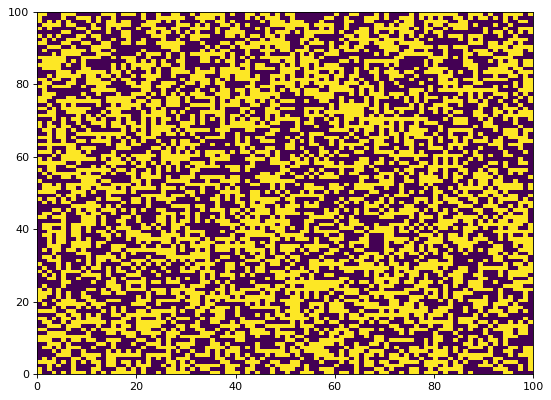

<Figure size 432x288 with 0 Axes>

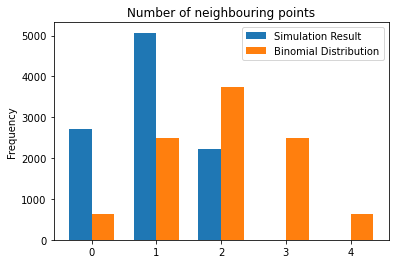

In [2]:
# Parameters used:
N = 100 # Size of the matrix used
Xa = 0.5 # atomic fraction of A atoms
n = 10**4 # Number of iterations taken
T = 1000 # Temperature in K
E = 0.5 # Energy of mixing

# Calculate and plot final configuration
Alloy = alloy.Create_alloy(N, Xa, n, T, E) 
plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
plt.pcolor(Alloy)
plt.figure()
alloy.test2D(Alloy, N, Xa)

## Ideal solution:

When $\varepsilon_{AB}=0$ the Gibbs energy of mixing is governed by entropy, and thus the atoms move randomly.
This random movement can be modeled by a random walk, which will have a mean displacement $\langle \mathbf{a} \rangle$ after $n$ steps equal to zero:
    
$\langle \mathbf{a} \rangle = \frac{1}{n}\sum_{i=1}^n \mathbf{a_i} = 0$

In [20]:
alloy.PDF('nut_en.pdf',size=(700,500))

This explains why the lattice is always random for the ideal solution regardless of the temperature and thus appears as white noise.

Thus temperature has no affect as it follows a Binomial distribution.

In [19]:
alloy.PDF('neutral.pdf',size=(700,400))

## Precipitate formation:

With $\varepsilon_{AB}$ being different to zero, we now have a preference if A-B atoms are next to each other or not.


With $\varepsilon_{AB}>0$, it is energetically faverable for atoms to separate into regions of A and B atoms only, i.e. create precipitates.

In [18]:
alloy.PDF('pos_en.pdf',size=(700,500))

There will be a temperature above which the entropy term will dominate and the alloy will resemble the ideal solution case.
Also, the size of the precipitates will depend on the temperature, where at lower temperatures in which precipitation is still favoured, smaller grains will tend to form.
As the temperature increases there is more energy for the atoms to diffuse and get closer to a global minimum.

In [17]:
alloy.PDF('posative.pdf',size=(700,400))

## Inter-metallic:

With $\varepsilon_{AB}<0$ it is energetially faverable for atoms to have different neighbours, resolting in an intermetallic structure.

Hence the checkerd board type structure.

In [16]:
alloy.PDF('neg_en.pdf',size=(700,500))

Again, as we raise the temperature there will be more diffusion, up to the point that an ideal solution is reached

In [15]:
alloy.PDF('negative.pdf',size=(700,400))

Another interesting aspect to consider is the effect of stoichiometry. As we diverge from a 50/50 mixture of A and B atoms, we notice that the alloy tends to have a more Binomial like distribution (which is represented by the $\varepsilon_{AB}=0$ data). This is because as we tend towards 100% A or B in composition, we are reducing the entropy in the system due to fewer possible configurations.

In [14]:
alloy.PDF('comp.pdf',size=(700,400))